## Meta

Comp:
https://www.kaggle.com/c/digit-recognizer    

Reference kernel:
https://www.kaggle.com/kanncaa1/pytorch-tutorial-for-deep-learning-lovers

## Imports

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline 
%load_ext autotime

In [20]:
from toolbox import *

import numpy as np # linear algebra
import pandas as pd # data processing
import torch
from torch.autograd import Variable # import variable from pytorch library

import matplotlib.pyplot as plt

    
import torch.nn as nn 
import warnings

import os

import torchvision.transforms as transforms
import pandas as pd
from sklearn.model_selection import train_test_split

warnings.filterwarnings("ignore")

time: 2.99 s


## Get MNIST data

In [26]:
current_path = os.getcwd()
download_data('digit-recognizer',current_path)

time: 12.8 s


In [27]:
#Listify files to download
all_data_files = os.listdir('data/') #Getting all files in data folder in a list
all_data_files = [x for x in all_data_files if x.endswith('.csv')] #Removing .ipynb files
all_data_files = [remove_from_right(x,4) for x in all_data_files] #Removing .csvs
all_data_files

['train', 'sample_submission', 'test']

time: 129 ms


In [28]:
for i in all_data_files:
    print(i + "=" + f"read_data('data/','csv','{i}')")
    print("")
    exec(i + "=" + f"read_data('data/','csv','{i}')")
    exec(f"shape = {i}.shape")
    print(f"Shape of {i}: ", shape)
    exec(f"data_types = {i}.dtypes")
    print("")
    print(f"Data types in {i}: \n \n ", data_types)
    print("---------------------")

train=read_data('data/','csv','train')

Shape of train:  (42000, 785)

Data types in train: 
 
  label       int64
pixel0      int64
pixel1      int64
pixel2      int64
pixel3      int64
            ...  
pixel779    int64
pixel780    int64
pixel781    int64
pixel782    int64
pixel783    int64
Length: 785, dtype: object
---------------------
sample_submission=read_data('data/','csv','sample_submission')

Shape of sample_submission:  (28000, 2)

Data types in sample_submission: 
 
  ImageId    int64
Label      int64
dtype: object
---------------------
test=read_data('data/','csv','test')

Shape of test:  (28000, 784)

Data types in test: 
 
  pixel0      int64
pixel1      int64
pixel2      int64
pixel3      int64
pixel4      int64
            ...  
pixel779    int64
pixel780    int64
pixel781    int64
pixel782    int64
pixel783    int64
Length: 784, dtype: object
---------------------
time: 5.94 s


## Basics

Convert Numpy array to torch and vice versa

In [3]:
# random numpy array
array = np.random.rand(2,2)
print("{} {}\n".format(type(array),array))

# from numpy to tensor
from_numpy_to_tensor = torch.from_numpy(array)
print("{}\n".format(from_numpy_to_tensor))

# from tensor to numpy
tensor = from_numpy_to_tensor
from_tensor_to_numpy = tensor.numpy()
print("{} {}\n".format(type(from_tensor_to_numpy),from_tensor_to_numpy))

<class 'numpy.ndarray'> [[0.0195143  0.62080117]
 [0.68728921 0.43115898]]

tensor([[0.0195, 0.6208],
        [0.6873, 0.4312]], dtype=torch.float64)

<class 'numpy.ndarray'> [[0.0195143  0.62080117]
 [0.68728921 0.43115898]]

time: 6.24 ms


Basic operations

In [4]:
tensor = torch.ones(3,3)
print("\n",tensor)

# Resize
print("{}{}\n".format(tensor.view(9).shape,tensor.view(9)))

# Addition
print("Addition: {}\n".format(torch.add(tensor,tensor)))

# Subtraction
print("Subtraction: {}\n".format(tensor.sub(tensor)))

# Element wise multiplication
print("Element wise multiplication: {}\n".format(torch.mul(tensor,tensor)))

# Element wise division
print("Element wise division: {}\n".format(torch.div(tensor,tensor)))

# Mean
tensor = torch.Tensor([1,2,3,4,5])
print("Mean: {}".format(tensor.mean()))

# Standart deviation (std)
print("std: {}".format(tensor.std()))


 tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
torch.Size([9])tensor([1., 1., 1., 1., 1., 1., 1., 1., 1.])

Addition: tensor([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]])

Subtraction: tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

Element wise multiplication: tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

Element wise division: tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

Mean: 3.0
std: 1.5811388492584229
time: 12 ms


PyTorch variables accumulates gradients

In [6]:
# define variable
var = Variable(torch.ones(3), requires_grad = True)
var

tensor([1., 1., 1.], requires_grad=True)

time: 5.32 ms


- Assume we have equation y = x^2
- Define x = [2,4] variable
- After calculation we find that y = [4,16] (y = x^2)
- Recap o equation is that o = (1/2)sum(y) = (1/2)sum(x^2)
- deriavative of o = x
- Result is equal to x so gradients are [2,4]
- Lets implement

In [9]:
# lets make basic backward propagation
# we have an equation that is y = x^2
array = [2,4]
tensor = torch.Tensor(array)
x = Variable(tensor, requires_grad = True)
y = x**2
print(" y =  ",y)

# recap o equation o = 1/2*sum(y)
o = (1/2)*sum(y)
print(" o =  ",o)

# backward
o.backward() # calculates gradients

# As I defined, variables accumulates gradients. In this part there is only one variable x.
# Therefore variable x should be have gradients
# Lets look at gradients with x.grad
print("gradients: ",x.grad)

 y =   tensor([ 4., 16.], grad_fn=<PowBackward0>)
 o =   tensor(10., grad_fn=<MulBackward0>)
gradients:  tensor([2., 4.])
time: 6.29 ms


Linear Regression

- y = Ax + B.
- A = slope of curve
- B = bias (point that intersect y-axis)

For example, we have car company. If the car price is low, we sell more car. If the car price is high, we sell less car. This is the fact that we know and we have data set about this fact.
The question is that what will be number of car sell if the car price is 100.

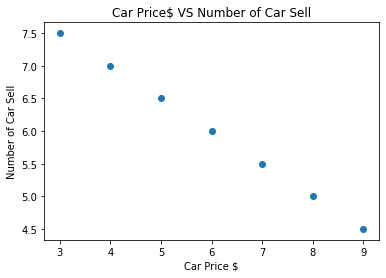

time: 205 ms


In [10]:
# lets define car prices
car_prices_array = [3,4,5,6,7,8,9]
car_price_np = np.array(car_prices_array,dtype=np.float32)
car_price_np = car_price_np.reshape(-1,1)
car_price_tensor = Variable(torch.from_numpy(car_price_np))

# lets define number of car sell
number_of_car_sell_array = [ 7.5, 7, 6.5, 6.0, 5.5, 5.0, 4.5]
number_of_car_sell_np = np.array(number_of_car_sell_array,dtype=np.float32)
number_of_car_sell_np = number_of_car_sell_np.reshape(-1,1)
number_of_car_sell_tensor = Variable(torch.from_numpy(number_of_car_sell_np))

# lets visualize our data
plt.scatter(car_prices_array,number_of_car_sell_array)
plt.xlabel("Car Price $")
plt.ylabel("Number of Car Sell")
plt.title("Car Price$ VS Number of Car Sell")
plt.show()

- Now this plot is our collected data
- We have a question that is what will be number of car sell if the car price is 100USD
- In order to solve this question we need to use linear regression.
- We need to line fit into this data. Aim is fitting line with minimum error.
- Steps of Linear Regression
 * create LinearRegression class
 * define model from this LinearRegression class
 * MSE: Mean squared error
 * Optimization (SGD:stochastic gradient descent)
 * Backpropagation
 * Prediction
 * Lets implement it with Pytorch

epoch 0, loss 30.407079696655273
epoch 50, loss 4.634291648864746
epoch 100, loss 3.131584644317627
epoch 150, loss 2.1161417961120605
epoch 200, loss 1.4299651384353638
epoch 250, loss 0.966286301612854
epoch 300, loss 0.6529605984687805
epoch 350, loss 0.441232830286026
epoch 400, loss 0.29815956950187683
epoch 450, loss 0.20147858560085297
epoch 500, loss 0.136147603392601
epoch 550, loss 0.09200068563222885
epoch 600, loss 0.06216878816485405
epoch 650, loss 0.04201004281640053
epoch 700, loss 0.028387848287820816
epoch 750, loss 0.019182728603482246
epoch 800, loss 0.012962513603270054
epoch 850, loss 0.00875940453261137
epoch 900, loss 0.005918978713452816
epoch 950, loss 0.003999681677669287
epoch 1000, loss 0.0027027283795177937


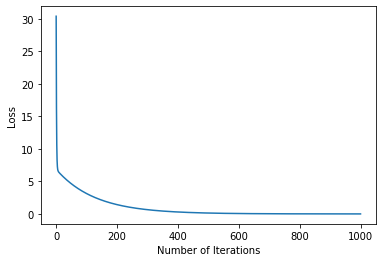

time: 524 ms


In [17]:
# Linear Regression with Pytorch

# create class
class LinearRegression(nn.Module):
    def __init__(self,input_size,output_size):
        # super function. It inherits from nn.Module and we can access everything in nn.Module
        super(LinearRegression,self).__init__()
        # Linear function.
        self.linear = nn.Linear(input_dim,output_dim)

    def forward(self,x):
        return self.linear(x)
    
# define model
input_dim = 1
output_dim = 1
model = LinearRegression(input_dim,output_dim) # input and output size are 1

# MSE
mse = nn.MSELoss()

# Optimization (find parameters that minimize error)
learning_rate = 0.02   # how fast we reach best parameters
optimizer = torch.optim.SGD(model.parameters(),lr = learning_rate)

# train model
loss_list = []
iteration_number = 1001
for iteration in range(iteration_number):
        
    # optimization
    optimizer.zero_grad() 
    
    # Forward to get output
    results = model(car_price_tensor)
    
    # Calculate Loss
    loss = mse(results, number_of_car_sell_tensor)
    
    # backward propagation
    loss.backward()
    
    # Updating parameters
    optimizer.step()
    
    # store loss
    loss_list.append(loss.data)
    
    # print loss
    if(iteration % 50 == 0):
        print('epoch {}, loss {}'.format(iteration, loss.data))

plt.plot(range(iteration_number),loss_list)
plt.xlabel("Number of Iterations")
plt.ylabel("Loss")
plt.show()

Prediction time!

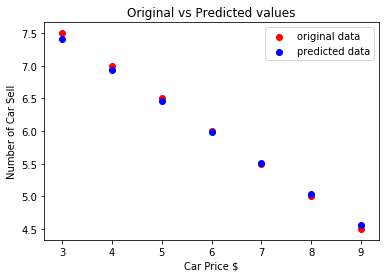

time: 256 ms


In [18]:
# predict our car price 
predicted = model(car_price_tensor).data.numpy()
plt.scatter(car_prices_array,number_of_car_sell_array,label = "original data",color ="red")
plt.scatter(car_prices_array,predicted,label = "predicted data",color ="blue")

# predict if car price is 10$, what will be the number of car sell
#predicted_10 = model(torch.from_numpy(np.array([10]))).data.numpy()
#plt.scatter(10,predicted_10.data,label = "car price 10$",color ="green")
plt.legend()
plt.xlabel("Car Price $")
plt.ylabel("Number of Car Sell")
plt.title("Original vs Predicted values")
plt.show()

## MNIST

#### Logistic Regression

- Linear regression is not good at classification.
- We use logistic regression for classification.
- linear regression + logistic function(softmax) = logistic regression

Steps of Logistic Regression
- Import Libraries
- Prepare Dataset
- We use MNIST dataset.
- There are 28*28 images and 10 labels from 0 to 9
- Data is not normalized so we divide each image to 255 that is basic normalization for images.
- In order to split data, we use train_test_split method from sklearn library
- Size of train data is 80% and size of test data is 20%.
- Create feature and target tensors. At the next parts we create variable from these tensors. As you remember we need   to define variable for accumulation of gradients.
- batch_size = batch size means is that for example we have data and it includes 1000 sample. We can train 1000         sample in a same time or we can divide it 10 groups which include 100 sample and train 10 groups in order. 
- Batch size is the group size. For example, I choose batch_size = 100, that means in order to train all data 
  only  once we have 336 groups. 
- We train each groups(336) that have batch_size(quota) 100. Finally we train 33600 sample one time.
- epoch: 1 epoch means training all samples one time.
- In our example: we have 33600 sample to train and we decide our batch_size is 100. Also we decide epoch is 29(accuracy achieves almost highest value when epoch is 29). Data is trained 29 times. Question is that how many iteration do I need? Lets calculate:
    * training data 1 times = training 33600 sample (because data includes 33600 sample)
    * But we split our data 336 groups(group_size = batch_size = 100) our data
    * Therefore, 1 epoch(training data only once) takes 336 iteration
    * We have 29 epoch, so total iterarion is 9744(that is almost 10000 which I used)

- TensorDataset(): Data set wrapping tensors. Each sample is retrieved by indexing tensors along the first dimension.
- DataLoader(): It combines dataset and sampler. It also provides multi process iterators over the dataset.

- Visualize one of the images in dataset
- Create Logistic Regression Model
- Same with linear regression.
- However as you expect, there should be logistic function in model right?
- In pytorch, logistic function is in the loss function where we will use at next parts.

- Instantiate Model Class
  * input_dim = 2828 # size of image pxpx
  * output_dim = 10 # labels 0,1,2,3,4,5,6,7,8,9
- create model
- Instantiate Loss Class
- Cross entropy loss
- It calculates loss that is not surprise :)
- It also has softmax(logistic function) in it.
- Instantiate Optimizer Class
- SGD Optimizer
- Traning the Model
- Prediction
- As a result, as you can see from plot, while loss decreasing, accuracy(almost 85%) is increasing and our model is learning(training).

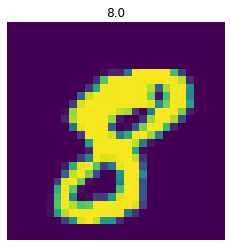

time: 3.78 s


In [64]:
# Prepare Dataset
# load data
train = pd.read_csv("data/train.csv",dtype = np.float32)

# split data into features(pixels) and labels(numbers from 0 to 9)
targets_numpy = train.label.values
features_numpy = train.loc[:,train.columns != "label"].values/255 # normalization

# train test split. Size of train data is 80% and size of test data is 20%. 
features_train, features_test, targets_train, targets_test = train_test_split(features_numpy,
                                                                             targets_numpy,
                                                                             test_size = 0.2,
                                                                             random_state = 42) 

# create feature and targets tensor for train set. As you remember we need variable to accumulate gradients. Therefore first we create tensor, then we will create variable
featuresTrain = torch.from_numpy(features_train)
targetsTrain = torch.from_numpy(targets_train).type(torch.LongTensor) # data type is long

# create feature and targets tensor for test set.
featuresTest = torch.from_numpy(features_test)
targetsTest = torch.from_numpy(targets_test).type(torch.LongTensor) # data type is long

# batch_size, epoch and iteration
batch_size = 100
n_iters = 10000
num_epochs = n_iters / (len(features_train) / batch_size)
num_epochs = int(num_epochs)

# Pytorch train and test sets
train = torch.utils.data.TensorDataset(featuresTrain,targetsTrain)
test = torch.utils.data.TensorDataset(featuresTest,targetsTest)

# data loader
train_loader = torch.utils.data.DataLoader(train, batch_size = batch_size, shuffle = False)
test_loader = torch.utils.data.DataLoader(test, batch_size = batch_size, shuffle = False)

# visualize one of the images in data set
plt.imshow(features_numpy[10].reshape(28,28))
plt.axis("off")
plt.title(str(targets_numpy[10]))
#plt.savefig('graph.png')
plt.show()

In [31]:
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegressionModel, self).__init__()
        # Linear part
        self.linear = nn.Linear(input_dim, output_dim)
        # There should be logistic function right?
        # However logistic function in pytorch is in loss function
        # So actually we do not forget to put it, it is only at next parts
    
    def forward(self, x):
        out = self.linear(x)
        return out

# Instantiate Model Class
input_dim = 28*28 # size of image px*px
output_dim = 10  # labels 0,1,2,3,4,5,6,7,8,9

# create logistic regression model
model = LogisticRegressionModel(input_dim, output_dim)

# Cross Entropy Loss  
error = nn.CrossEntropyLoss()

# SGD Optimizer 
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

time: 5.26 ms


Cross entropy loss:

https://ml-cheatsheet.readthedocs.io/en/latest/loss_functions.html

In [34]:
# Traning the Model
count = 0
loss_list = []
iteration_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        
        # Define variables
        train = Variable(images.view(-1, 28*28))
        labels = Variable(labels)
        
        # Clear gradients
        optimizer.zero_grad()
        
        # Forward propagation
        outputs = model(train)
        
        # Calculate softmax and cross entropy loss
        loss = error(outputs, labels)
        
        # Calculate gradients
        loss.backward()
        
        # Update parameters
        optimizer.step()
        
        count += 1
        
        # Prediction
        if count % 50 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Predict test dataset
            for images, labels in test_loader: 
                test = Variable(images.view(-1, 28*28))
                
                # Forward propagation
                outputs = model(test)
                
                # Get predictions from the maximum value
                predicted = torch.max(outputs.data, 1)[1]
                
                # Total number of labels
                total += len(labels)
                
                # Total correct predictions
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / float(total)
            
            # store loss and iteration
            loss_list.append(loss.data)
            iteration_list.append(count)
        if count % 500 == 0:
            # Print Loss
            print('Iteration: {}  Loss: {}  Accuracy: {}%'.format(count, loss.data, accuracy))

Iteration: 500  Loss: 1.8488918542861938  Accuracy: 66.8452377319336%
Iteration: 1000  Loss: 1.6233633756637573  Accuracy: 76.55952453613281%
Iteration: 1500  Loss: 1.3034260272979736  Accuracy: 79.3452377319336%
Iteration: 2000  Loss: 1.19568932056427  Accuracy: 80.88095092773438%
Iteration: 2500  Loss: 1.0457690954208374  Accuracy: 81.85713958740234%
Iteration: 3000  Loss: 0.9323950409889221  Accuracy: 82.53571319580078%
Iteration: 3500  Loss: 0.8992565274238586  Accuracy: 83.03571319580078%
Iteration: 4000  Loss: 0.7436603307723999  Accuracy: 83.52381134033203%
Iteration: 4500  Loss: 0.9613969326019287  Accuracy: 84.0%
Iteration: 5000  Loss: 0.8032189011573792  Accuracy: 84.41666412353516%
Iteration: 5500  Loss: 0.7506822347640991  Accuracy: 84.5952377319336%
Iteration: 6000  Loss: 0.862053394317627  Accuracy: 84.77381134033203%
Iteration: 6500  Loss: 0.6639457941055298  Accuracy: 84.95237731933594%
Iteration: 7000  Loss: 0.7105889320373535  Accuracy: 85.11904907226562%
Iteration: 7

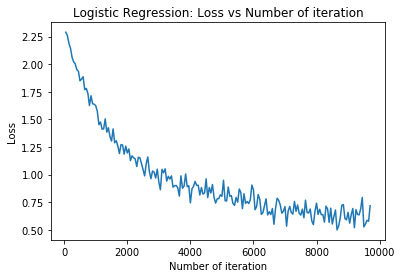

time: 227 ms


In [35]:
# visualization
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("Logistic Regression: Loss vs Number of iteration")
plt.show()

#### Artificial Neural Network (ANN)

- Logistic regression is good at classification but when complexity(non linearity) increases, the accuracy of model decreases.
- Therefore, we need to increase complexity of model. In order to increase complexity of model, we need to add more non linear functions as hidden layer.
- What we expect from artificial neural network is that when complexity increases, we use more hidden layers and our model can adapt better. As a result accuracy increase.

In [65]:
# Create ANN Model
class ANNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(ANNModel, self).__init__()
        # Linear function 1: 784 --> 100
        self.fc1 = nn.Linear(input_dim, hidden_dim) 
        # Non-linearity 1
        self.relu1 = nn.ReLU()
        
        # Linear function 2: 100 --> 100
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        # Non-linearity 2
        self.tanh2 = nn.Tanh()
        
        # Linear function 3: 100 --> 100
        self.fc3 = nn.Linear(hidden_dim, hidden_dim)
        # Non-linearity 3
        self.elu3 = nn.ELU()
        
        # Linear function 4 (readout): 100 --> 10
        self.fc4 = nn.Linear(hidden_dim, output_dim)  
    
    def forward(self, x):
        # Linear function 1
        out = self.fc1(x)
        # Non-linearity 1
        out = self.relu1(out)
        
        # Linear function 2
        out = self.fc2(out)
        # Non-linearity 2
        out = self.tanh2(out)
        
        # Linear function 2
        out = self.fc3(out)
        # Non-linearity 2
        out = self.elu3(out)
        
        # Linear function 4 (readout)
        out = self.fc4(out)
        return out

# instantiate ANN
input_dim = 28*28
hidden_dim = 150 #hidden layer dim is one of the hyper parameter and it should be chosen and tuned. For now I only say 150 there is no reason.
output_dim = 10

# Create ANN
model = ANNModel(input_dim, hidden_dim, output_dim)

# Cross Entropy Loss 
error = nn.CrossEntropyLoss()

# SGD Optimizer
learning_rate = 0.02
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

time: 7.43 ms


In [68]:
# ANN model training
count = 0
loss_list = []
iteration_list = []
accuracy_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        train = Variable(images.view(-1, 28*28))
        labels = Variable(labels)
        
        # Clear gradients
        optimizer.zero_grad()
        
        # Forward propagation
        outputs = model(train)
        
        # Calculate softmax and ross entropy loss
        loss = error(outputs, labels)
        
        # Calculating gradients
        loss.backward()
        
        # Update parameters
        optimizer.step()
        
        count += 1
        
        if count % 50 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Predict test dataset
            for images, labels in test_loader:

                test = Variable(images.view(-1, 28*28))
                
                # Forward propagation
                outputs = model(test)
                
                # Get predictions from the maximum value
                predicted = torch.max(outputs.data, 1)[1]
                
                # Total number of labels
                total += len(labels)

                # Total correct predictions
                correct += (predicted == labels).sum()
            
            accuracy = 100 * correct / float(total)
            
            # store loss and iteration
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
            if count % 500 == 0:
                # Print Loss
                print('Iteration: {}  Loss: {}  Accuracy: {} %'.format(count, loss.data, accuracy))

Iteration: 500  Loss: 0.34345322847366333  Accuracy: 89.73809814453125 %
Iteration: 1000  Loss: 0.2793378233909607  Accuracy: 90.82142639160156 %
Iteration: 1500  Loss: 0.1297503113746643  Accuracy: 91.58333587646484 %
Iteration: 2000  Loss: 0.2232135832309723  Accuracy: 92.72618865966797 %
Iteration: 2500  Loss: 0.25943413376808167  Accuracy: 93.39286041259766 %
Iteration: 3000  Loss: 0.09895860403776169  Accuracy: 94.0 %
Iteration: 3500  Loss: 0.19934162497520447  Accuracy: 94.33333587646484 %
Iteration: 4000  Loss: 0.049069251865148544  Accuracy: 94.8452377319336 %
Iteration: 4500  Loss: 0.24540582299232483  Accuracy: 94.92857360839844 %
Iteration: 5000  Loss: 0.07855833321809769  Accuracy: 95.30952453613281 %
Iteration: 5500  Loss: 0.16446945071220398  Accuracy: 95.25 %
Iteration: 6000  Loss: 0.16683751344680786  Accuracy: 95.45237731933594 %
Iteration: 6500  Loss: 0.09787347912788391  Accuracy: 95.85713958740234 %
Iteration: 7000  Loss: 0.09141318500041962  Accuracy: 96.1428604125

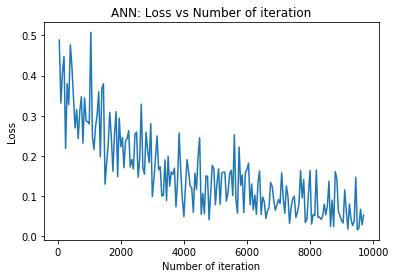

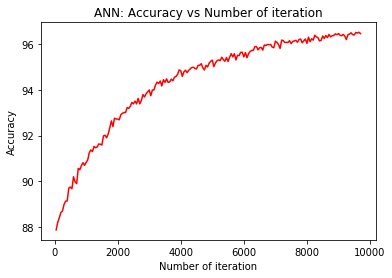

time: 448 ms


In [69]:
# visualization loss
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("ANN: Loss vs Number of iteration")
plt.show()

# visualization accuracy 
plt.plot(iteration_list,accuracy_list,color = "red")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("ANN: Accuracy vs Number of iteration")
plt.show()